In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_coffee = pd.read_feather("resources/coffee_ratings_full.feather")

<Axes: xlabel='sample_size'>

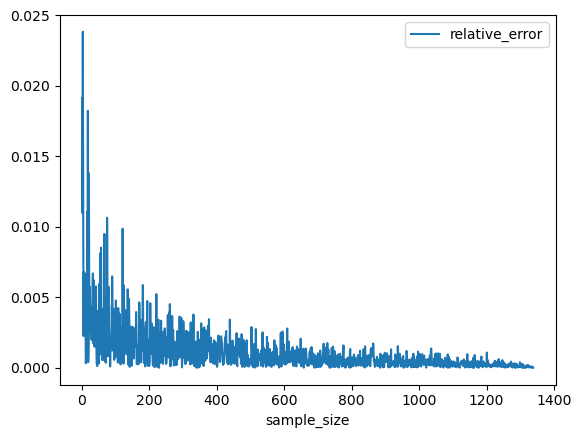

In [3]:
# sample_size: örneklem büyüklüğünü tutar
# relative_error: göreceli hatayı tutar
df_error = pd.DataFrame(columns=["sample_size","relative_error"])

# popülasyonun ortalama değeri hesaplanır
pop_mean = df_coffee["total_cup_points"].mean()

# Göreceli hata hesaplama
for num_of_rows in range(1, df_coffee.shape[0] + 1):
    rel_err = np.abs(pop_mean - df_coffee.sample(n=num_of_rows)["total_cup_points"].mean()) / pop_mean
    # Sonuçları dataframe'e ekleme
    # her iterasyonda örneklem büyüklüğünü ve göreceli hata değerini dataframe'e ekliyor
    df_error.loc[df_error.index.shape[0]] = [num_of_rows, rel_err]

# Görselleştirme
df_error.plot(x="sample_size", y="relative_error", kind="line")

In [4]:
# Olasılık teorisi ve kartezyen çarpımı
# 4 zarın aynı anda atılması durumunda oluşabilecek tüm kombinasyonların listesi
# itertools kütüphanesi tekrarlı işlemler için verimli araçlar sağlar
import itertools as it
dice = {
    "die1": [1,2,3,4,5,6],
    "die2": [1,2,3,4,5,6],
    "die3": [1,2,3,4,5,6],
    "die4": [1,2,3,4,5,6],
}
result = pd.DataFrame(it.product(*dice.values()), columns=dice.keys())
result

,die1,die2,die3,die4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


In [5]:
# tüm zarların toplamı 10 olan kaç farklı kombinasyon vardır?
result = pd.DataFrame(it.product(*dice.values()), columns=(dice.keys()))

result['sum_roll'] = result.sum(axis=1)

sum_10 = result[result['sum_roll'] == 10]

sum_10

,die1,die2,die3,die4,sum_roll
11,1,1,2,6,10
16,1,1,3,5,10
21,1,1,4,4,10
26,1,1,5,3,10
31,1,1,6,2,10
...,...,...,...,...,...
906,5,2,2,1,10
936,5,3,1,1,10
1081,6,1,1,2,10
1086,6,1,2,1,10


In [6]:
# Örnek bir popülasyon oluşturalım
population = pd.Series([1,2,3,4,5])

# Tüm olası örneklemleri oluşturan fonksiyon
def get_all_samples(data, sample_size):
    # itertools.combination kullanarak tüm olası örneklemleri oluştur
    all_combinations = list(it.combinations(data, sample_size))
    
    # Her kombinasyon için ortalama hesaplama
    sample_means = [np.mean(combo) for combo in all_combinations]
    return pd.Series(sample_means)

sample_means = get_all_samples(population, 3)
sample_means

0    2.000000
1    2.333333
2    2.666667
3    2.666667
4    3.000000
5    3.333333
6    3.000000
7    3.333333
8    3.666667
9    4.000000
dtype: float64

In [7]:
# Zar atışı örneği
dice = {
    "die1": [1,2,3,4,5,6],
    "die2": [1,2,3,4,5,6]
}

# Tüm olası kombinasyonları oluştur
all_rolls = pd.DataFrame(it.product(*dice.values()), columns=dice.keys())

# Her atışın ortalamasını hesapla
all_rolls['mean'] = all_rolls.mean(axis=1)
print(all_rolls)

    die1  die2  mean
0      1     1   1.0
1      1     2   1.5
2      1     3   2.0
3      1     4   2.5
4      1     5   3.0
5      1     6   3.5
6      2     1   1.5
7      2     2   2.0
8      2     3   2.5
9      2     4   3.0
10     2     5   3.5
11     2     6   4.0
12     3     1   2.0
13     3     2   2.5
14     3     3   3.0
15     3     4   3.5
16     3     5   4.0
17     3     6   4.5
18     4     1   2.5
19     4     2   3.0
20     4     3   3.5
21     4     4   4.0
22     4     5   4.5
23     4     6   5.0
24     5     1   3.0
25     5     2   3.5
26     5     3   4.0
27     5     4   4.5
28     5     5   5.0
29     5     6   5.5
30     6     1   3.5
31     6     2   4.0
32     6     3   4.5
33     6     4   5.0
34     6     5   5.5
35     6     6   6.0


In [8]:
import random

restaurant_ratings = pd.DataFrame({
    'restaurant': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'A'],
    'city': ['Istanbul', 'Ankara', 'Istanbul', 'Izmir', 'Istanbul', 'Ankara', 'Izmir', 'Istanbul'],
    'rating': [4.5, 4.0, 4.8, 3.9, 4.2, 4.1, 4.7, 4.4]
})

# En çok değerlendirme alan şehirlerden iki tanesini örneklem olarak seç
top_cities = restaurant_ratings['city'].value_counts().index.tolist()
sampled_cities = random.sample(top_cities, k=2)

# Seçilen şehirlerdeki restoranları filtrele
city_condition = restaurant_ratings['city'].isin(sampled_cities)
filtered_restaurants = restaurant_ratings[city_condition]

# Her şehirden eşit sayıda rastgele örneklem al
sampled_restaurants = filtered_restaurants.groupby('city').sample(n=2)
sampled_restaurants

,restaurant,city,rating
1,B,Ankara,4.0
5,B,Ankara,4.1
6,C,Izmir,4.7
3,D,Izmir,3.9


In [9]:
# Öğrenci notları üzerine örnekleme
student_grades = pd.DataFrame({
    'student_id': range(1,101),
    'department': ['CS', 'EE', 'ME', 'CS', 'EE'] * 20,
    'grade': np.random.normal(70, 10, 100)
})

# Her bölümden 10 öğrenci seçer
sampled_students = student_grades.groupby('department').sample(n=10)

# Seçilmiş öğrencileri bölümlere göre gruplayıp ortalama notları hespalar
dept_means = sampled_students.groupby('department')['grade'].mean()
dept_means

department
CS    68.237577
EE    68.762360
ME    74.961341
Name: grade, dtype: float64

In [10]:
coffee_ratings = pd.read_feather("resources/coffee_ratings_full.feather")
coffee_ratings

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [11]:
top_counted_countries = coffee_ratings['country_of_origin'].value_counts().index.tolist()
top_counted_countries

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'Taiwan',
 'United States (Hawaii)',
 'Honduras',
 'Costa Rica',
 'Ethiopia',
 'Tanzania, United Republic Of',
 'Uganda',
 'Thailand',
 'Nicaragua',
 'Kenya',
 'El Salvador',
 'Indonesia',
 'China',
 'India',
 'Malawi',
 'United States',
 'Peru',
 'Myanmar',
 'Vietnam',
 'Haiti',
 'Philippines',
 'United States (Puerto Rico)',
 'Panama',
 'Ecuador',
 'Laos',
 'Burundi',
 'Papua New Guinea',
 'Rwanda',
 'Zambia',
 'Japan',
 'Mauritius',
 'Cote d?Ivoire']

In [12]:
coffee_ratings_top = coffee_ratings[coffee_ratings['country_of_origin'].isin(top_counted_countries)]
coffee_ratings_top

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [13]:
top_countries_samp = random.sample(top_counted_countries, k=2)
top_countries_samp

['Colombia', 'Ecuador']

In [14]:
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cls = coffee_ratings_top[top_condition]
coffee_ratings_cls

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
47,86.00,Arabica,lusso lab,Colombia,ecobio colombia,None,None,NONE,lusso coffee lab,900-1500m,...,Green,1.0,"March 20th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,900.0,1500.0,1200.0
54,85.92,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0215,exportadora de cafe condor s.a,1800 msnm,...,Blue-Green,0.0,"July 26th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0
84,85.25,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora agricola,3-68-0102,exportadora de cafe condor s.a,1550 msnm,...,Green,0.0,"April 7th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1550.0,1550.0,1550.0
85,85.25,Arabica,compañia colombiana agroindustrial s.a,Colombia,None,None,trilladora boananza,3-79-0634,ecom cca sa,1550,...,Green,2.0,"January 17th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1550.0,1550.0,1550.0
89,85.08,Arabica,carcafe ltda ci,Colombia,None,None,pasto,3-59-3115,carcafe ltda,2.560 msnm,...,None,0.0,"August 17th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,2560.0,2560.0,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,79.33,Arabica,the coffee source inc.,Colombia,several,None,spot,3-279-390,the coffee source inc.,1200,...,Green,3.0,"January 8th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
1242,78.00,Arabica,mao-heng chu,Colombia,None,None,None,03/01/1632,None,None,...,Green,3.0,"November 30th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
1295,72.83,Arabica,honor dela fuente,Colombia,None,None,None,3,costco wholesale industries,None,...,Bluish-Green,15.0,"March 3rd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [15]:
coffee_ratings_cls.loc[:, 'country_of_origin'] = \
    coffee_ratings_cls['country_of_origin'].\
    astype('category').\
    cat.remove_unused_categories()

In [16]:
coffee_ratings_clst = coffee_ratings_cls.\
    groupby('country_of_origin').\
    sample(n=len(coffee_ratings_top) // 6, replace=True)
coffee_ratings_clst.shape

(444, 43)

<Axes: xlabel='n_dice', ylabel='n_outcomes'>

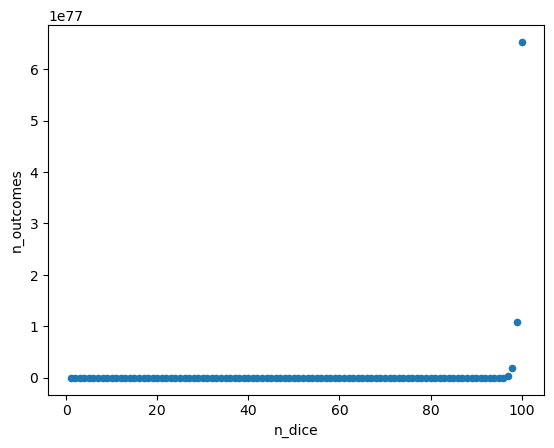

In [17]:
# 1-100 arasında zar sayısı oluştur
# Her zaman zar sayısı için olası sonuç sayısını hesapla
# her zar için 6 sonuç, yani n zar varsa 6^n sonuç vardır
# sonuçları dataframe'e dönüştür ve görselleştir

n_dice = list(range(1,101))

n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)
outcomes = pd.DataFrame({
    'n_dice': n_dice,
    'n_outcomes': n_outcomes
})
outcomes.plot(x='n_dice', y='n_outcomes', kind='scatter')

In [18]:
# İki zar atış simülasyonu
dice = {
    "die1": range(1, 7),
    "die2": range(1, 7)
}

# Kartezyen çarpım
combinations = pd.DataFrame(it.product(*dice.values()), columns=dice.keys())
combinations

,die1,die2
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,2,1
7,2,2
8,2,3
9,2,4


Olasılık dağılımı: sum
2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
Name: count, dtype: float64


<Axes: xlabel='sum'>

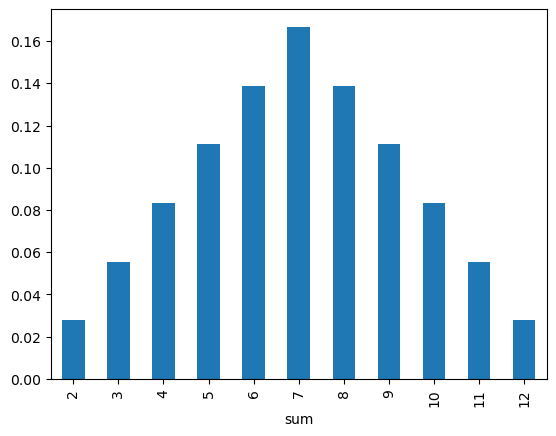

In [19]:
combinations['sum'] = combinations.sum(axis=1)
probability_dist = combinations['sum'].value_counts().sort_index() / combinations.shape[0]
print(f"Olasılık dağılımı: {probability_dist}")
probability_dist.plot(kind="bar")

In [20]:
# 3 zar için atış simülasyonu
dice_3 = {
    "die1": range(1,7),
    "die2": range(1,7),
    "die3": range(1,7)
}

combinations_3 = pd.DataFrame(it.product(*dice_3.values()), columns=dice_3.keys())
combinations_3['sum'] = combinations.sum(axis=1)